# Курсовой проект

In [394]:
'''Импорт модулей, библиотек'''
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [395]:
DATASET_TRAIN = 'course_project_train.csv'
DATASET_TEST = 'course_project_test.csv'

### Этап 1. Обзор обучающего датасета

In [396]:
df_train = pd.read_csv(DATASET_TRAIN)

In [397]:
df_train.head(10) # первые 10 строк датасета

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0
7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1
8,Home Mortgage,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,home improvements,Short Term,129734.0,19.0,17.0,NaN,0
9,Home Mortgage,NaN,1 year,0.0,10.0,24.6,511302.0,0.0,6.0,0.0,debt consolidation,Long Term,572880.0,205333.0,17613.0,NaN,1


In [398]:
df_train.info() # информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [399]:
df_train.shape # форма датасета

(7500, 17)

In [400]:
df_train.describe() # основные показатели признаков

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


### Этап 2. Обработка пропусков тренировочного датасета

In [401]:
df_train_prep = df_train.copy()

In [402]:
''' замена пропусков признака "Annual Income" медианным значением'''
AI_mean = df_train_prep['Annual Income'].median()
df_train_prep['Annual Income'].fillna(AI_mean, inplace=True)

In [403]:
''' заменаа пропусков признака "Years in current job" максимальным значением '''
df_train_prep['Years in current job'].fillna(2332, inplace=True)

In [404]:
''' удаление признака "Months since last delinquent" из-за большого количества пропусков '''
df_train_prep.drop('Months since last delinquent', axis=1, inplace=True)

In [405]:
''' заменаа пропусков признака "Bankruptcies" нулевым значением '''
df_train_prep['Bankruptcies'].fillna(0, inplace=True)

In [406]:
''' замена пропусков признака "Credit Score" медианным значением'''
df_train_prep['Credit Score'].fillna(df_train_prep['Credit Score'].median(), inplace=True)

In [407]:
df_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              7500 non-null   float64
 2   Years in current job       7500 non-null   object 
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  Term                       7500 non-null   object 
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

### Этап 2.1 Обработка пропусков тестового датасета

In [408]:
df_test = pd.read_csv(DATASET_TEST)

In [409]:
df_test_prep = df_test.copy()

In [410]:
''' Обзор тестового датасета'''
df_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [411]:
''' замена пропусков признака "Annual Income" медианным значением'''
df_test_prep['Annual Income'].fillna(df_test_prep['Annual Income'].median(), inplace=True)
''' заменаа пропусков признака "Years in current job" максимальным значением '''
df_test_prep['Years in current job'].fillna(2332, inplace=True)
''' удаление признака "Months since last delinquent" из-за большого количества пропусков '''
df_test_prep.drop('Months since last delinquent', axis=1, inplace=True)
''' заменаа пропусков признака "Bankruptcies" максимальным значением '''
df_test_prep['Bankruptcies'].fillna(0, inplace=True)
''' замена пропусков признака "Credit Score" медианным значением'''
df_test_prep['Credit Score'].fillna(df_test_prep['Credit Score'].median(), inplace=True)

In [412]:
df_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             2500 non-null   object 
 1   Annual Income              2500 non-null   float64
 2   Years in current job       2500 non-null   object 
 3   Tax Liens                  2500 non-null   float64
 4   Number of Open Accounts    2500 non-null   float64
 5   Years of Credit History    2500 non-null   float64
 6   Maximum Open Credit        2500 non-null   float64
 7   Number of Credit Problems  2500 non-null   float64
 8   Bankruptcies               2500 non-null   float64
 9   Purpose                    2500 non-null   object 
 10  Term                       2500 non-null   object 
 11  Current Loan Amount        2500 non-null   float64
 12  Current Credit Balance     2500 non-null   float64
 13  Monthly Debt               2500 non-null   float

### Этап 3. Обработка выбросов тренировочного датасета

In [413]:
def plot_hist_n_kde(feature, feature_name, hist_bins=50, x_log=False, y_log=False):
    rcParams['font.size'] = 8
    plt.figure(figsize=(12,5))

    plt.subplot(121)
    feature.hist(bins=hist_bins)
    plt.xlabel(feature_name)
    plt.ylabel('Кол-во записей в дата-сете')
    if y_log:
        plt.yscale('log')
    if x_log:
        plt.xscale('log')

    plt.subplot(122)
    sns.kdeplot(feature,legend=False,shade=True)
    plt.xlabel(feature_name)
    plt.ylabel('Плотность')
    if y_log:
        plt.yscale('log')
    if x_log:
        plt.xscale('log')
        
    plt.suptitle(f'Распределение значений признака "{feature_name}"',va='bottom',size=10)
    plt.show()

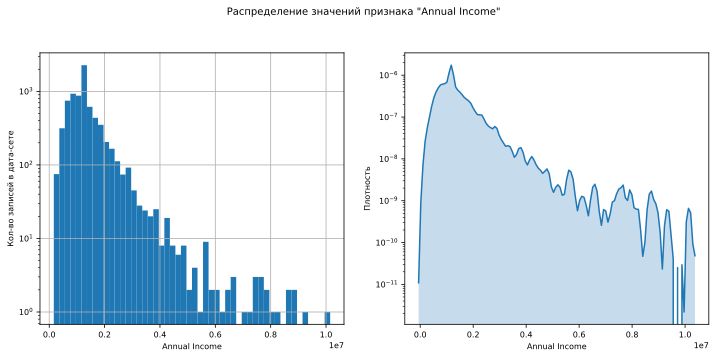

In [414]:
''' Annual Income '''
plot_hist_n_kde(df_train_prep['Annual Income'], 'Annual Income', y_log=True)

In [415]:
''' Tax Liens '''
df_train_prep['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

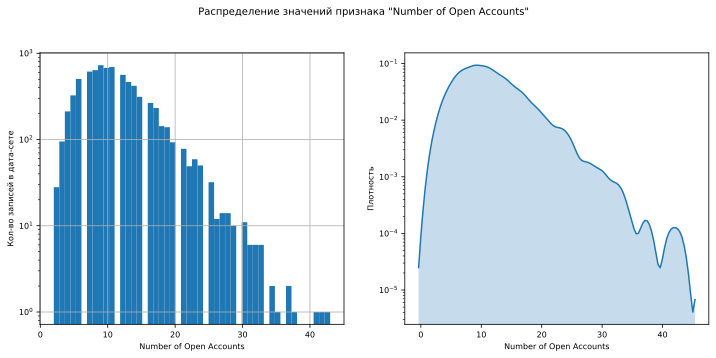

In [416]:
''' Number of Open Accounts '''
plot_hist_n_kde(df_train_prep['Number of Open Accounts'], 'Number of Open Accounts', y_log=True)

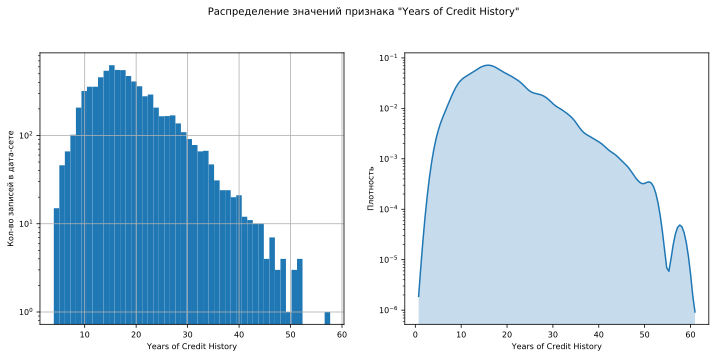

In [417]:
'''Years of Credit History'''
plot_hist_n_kde(df_train_prep['Years of Credit History'], 'Years of Credit History',  y_log=True)

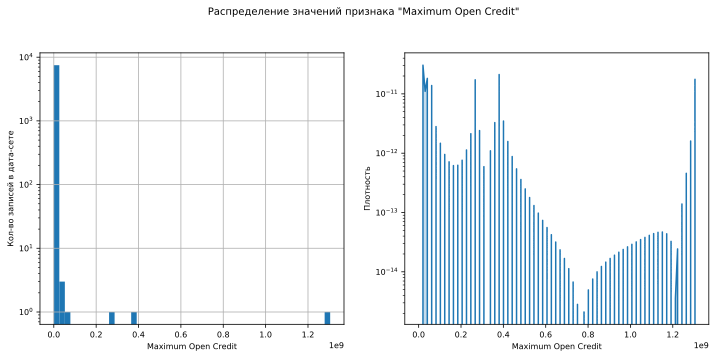

In [418]:
'''Maximum Open Credit'''
plot_hist_n_kde(df_train_prep['Maximum Open Credit'], 'Maximum Open Credit', y_log=True)

In [419]:
df_train_prep.loc[df_train_prep['Maximum Open Credit'] > (10**7), 'Maximum Open Credit'] = df_train_prep['Maximum Open Credit'].median()

In [420]:
df_train_prep.loc[df_train_prep['Maximum Open Credit'] == 0,'Maximum Open Credit'] = df_train_prep['Maximum Open Credit'].median()

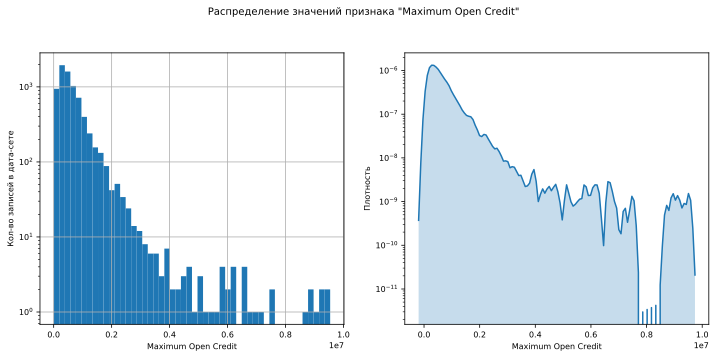

In [421]:
plot_hist_n_kde(df_train_prep['Maximum Open Credit'], 'Maximum Open Credit', y_log=True)

In [422]:
'''Number of Credit Problems'''
df_train_prep['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [423]:
'''Bankruptcies'''
df_train_prep['Bankruptcies'].value_counts()

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

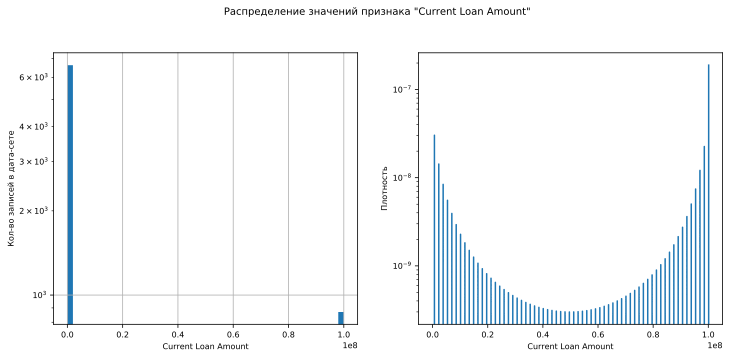

In [424]:
'''Current Loan Amount'''
plot_hist_n_kde(df_train_prep['Current Loan Amount'], 'Current Loan Amount', y_log=True)

In [425]:
df_train_prep['Current Loan Amount']

0       99999999.0
1         264968.0
2       99999999.0
3         121396.0
4         125840.0
           ...    
7495      129360.0
7496      444048.0
7497    99999999.0
7498      615274.0
7499       26928.0
Name: Current Loan Amount, Length: 7500, dtype: float64

In [426]:
df_train_prep.loc[df_train_prep['Current Loan Amount'] == 99999999,'Current Loan Amount'] = df_train_prep['Current Loan Amount'].median()

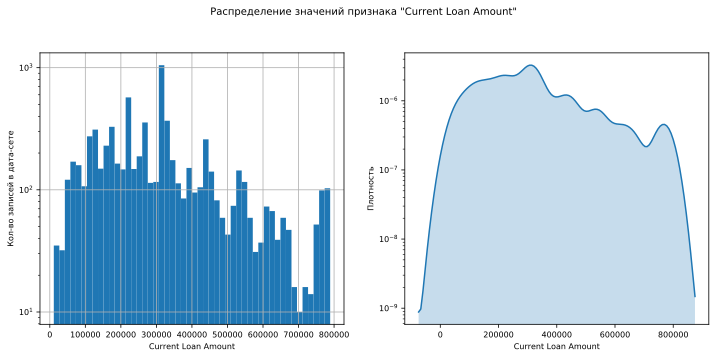

In [427]:
plot_hist_n_kde(df_train_prep['Current Loan Amount'], 'Current Loan Amount', y_log=True)

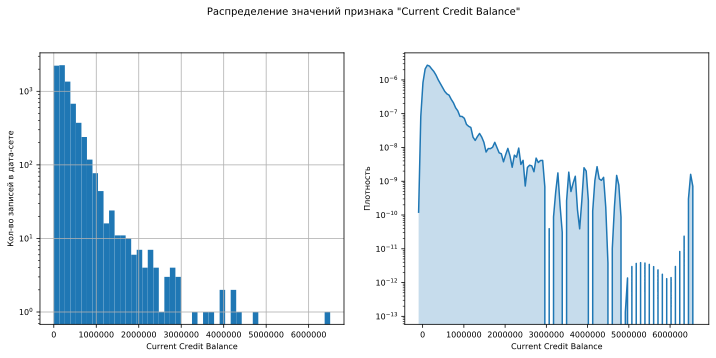

In [428]:
'''Current Credit Balance'''
plot_hist_n_kde(df_train_prep['Current Credit Balance'], 'Current Credit Balance', y_log=True)

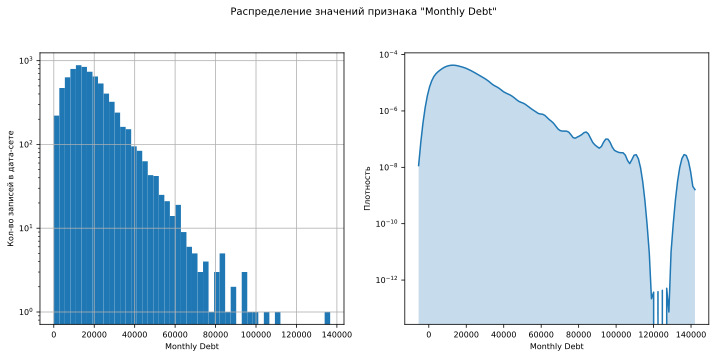

In [429]:
'''Monthly Debt'''
plot_hist_n_kde(df_train_prep['Monthly Debt'], 'Monthly Debt', y_log=True)

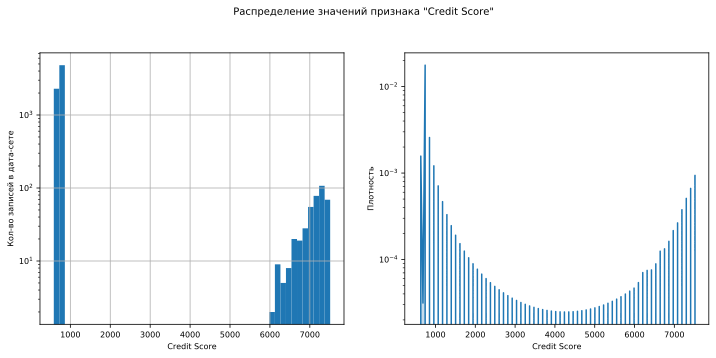

In [430]:
'''Credit Score'''
plot_hist_n_kde(df_train_prep['Credit Score'], 'Credit Score', y_log=True)

In [431]:
df_train_prep['Credit Score'].median()

731.0

In [432]:
df_train_prep.loc[df_train_prep['Credit Score'] > 1000,'Credit Score'] = df_train_prep['Credit Score'].median()

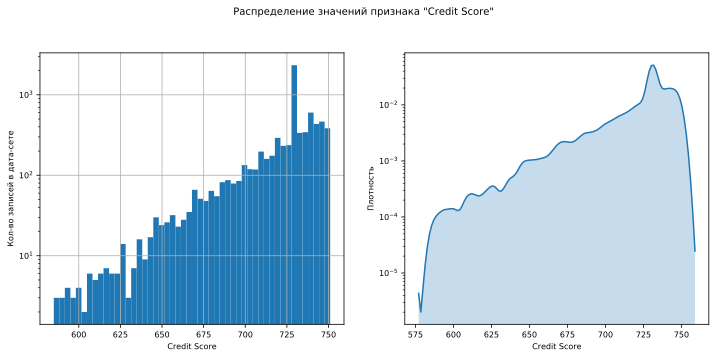

In [433]:
plot_hist_n_kde(df_train_prep['Credit Score'], 'Credit Score', y_log=True)

In [434]:
'''Credit Default'''
df_train_prep['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

### Этап 3.1 Обработка выбросов тестового датасета

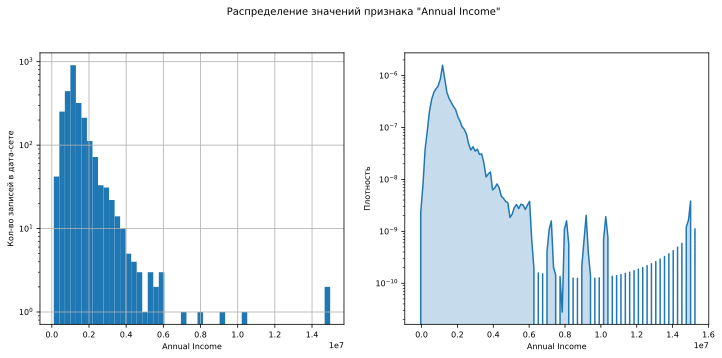

In [435]:
''' Annual Income '''
plot_hist_n_kde(df_test_prep['Annual Income'], 'Annual Income', y_log=True)

In [436]:
''' Tax Liens '''
df_test_prep['Tax Liens'].value_counts()

0.0     2445
1.0       45
2.0        5
15.0       1
3.0        1
6.0        1
4.0        1
5.0        1
Name: Tax Liens, dtype: int64

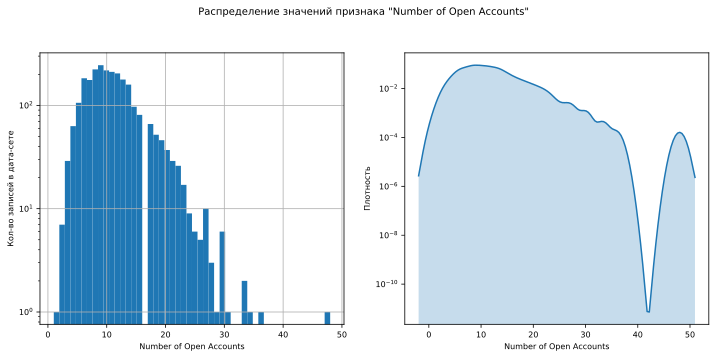

In [437]:
''' Number of Open Accounts '''
plot_hist_n_kde(df_test_prep['Number of Open Accounts'], 'Number of Open Accounts', y_log=True)

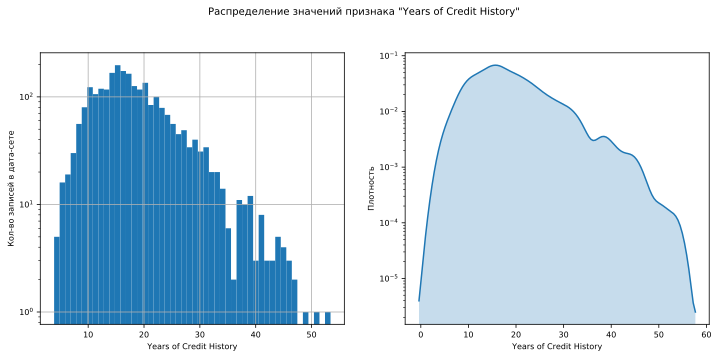

In [438]:
'''Years of Credit History'''
plot_hist_n_kde(df_test_prep['Years of Credit History'], 'Years of Credit History',  y_log=True)

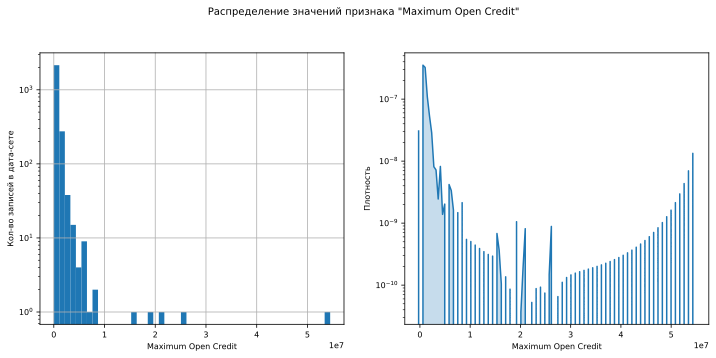

In [439]:
'''Maximum Open Credit'''
plot_hist_n_kde(df_test_prep['Maximum Open Credit'], 'Maximum Open Credit', y_log=True)

In [440]:
df_test_prep.loc[df_test_prep['Maximum Open Credit'] > (10**7), 'Maximum Open Credit'] = df_test_prep['Maximum Open Credit'].median()

In [441]:
df_test_prep.loc[df_test_prep['Maximum Open Credit'] == 0,'Maximum Open Credit'] = df_test_prep['Maximum Open Credit'].median()

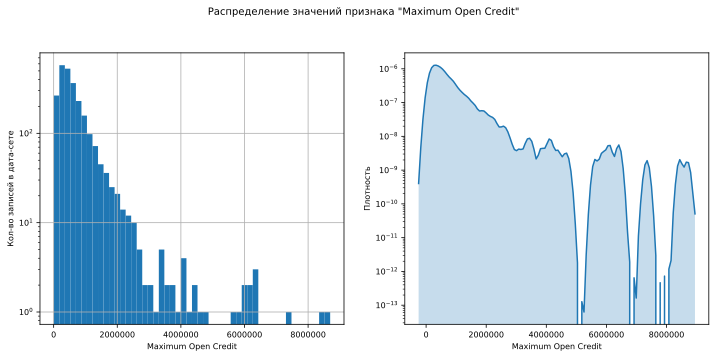

In [442]:
plot_hist_n_kde(df_test_prep['Maximum Open Credit'], 'Maximum Open Credit', y_log=True)

In [443]:
'''Number of Credit Problems'''
df_test_prep['Number of Credit Problems'].value_counts()

0.0     2177
1.0      280
2.0       29
3.0        7
5.0        4
15.0       1
4.0        1
7.0        1
Name: Number of Credit Problems, dtype: int64

In [444]:
'''Bankruptcies'''
df_test_prep['Bankruptcies'].value_counts()

0.0    2255
1.0     234
2.0       5
3.0       3
5.0       2
4.0       1
Name: Bankruptcies, dtype: int64

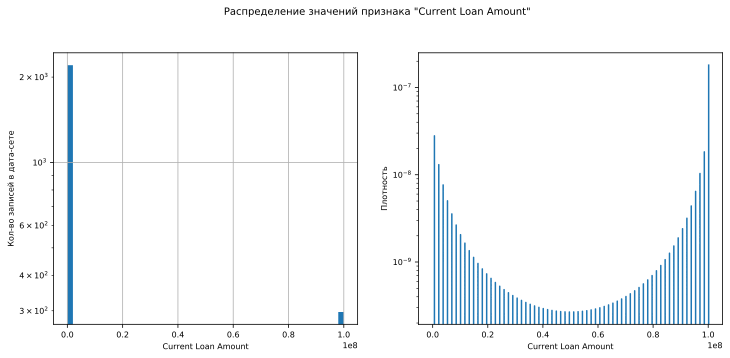

In [445]:
'''Current Loan Amount'''
plot_hist_n_kde(df_test_prep['Current Loan Amount'], 'Current Loan Amount', y_log=True)

In [446]:
df_test_prep['Current Loan Amount']

0         162470.0
1          78298.0
2         200178.0
3         217382.0
4         777634.0
           ...    
2495    99999999.0
2496      468512.0
2497      430496.0
2498      257774.0
2499      763004.0
Name: Current Loan Amount, Length: 2500, dtype: float64

In [447]:
df_test_prep.loc[df_test_prep['Current Loan Amount'] == 99999999,'Current Loan Amount'] = df_test_prep['Current Loan Amount'].median()

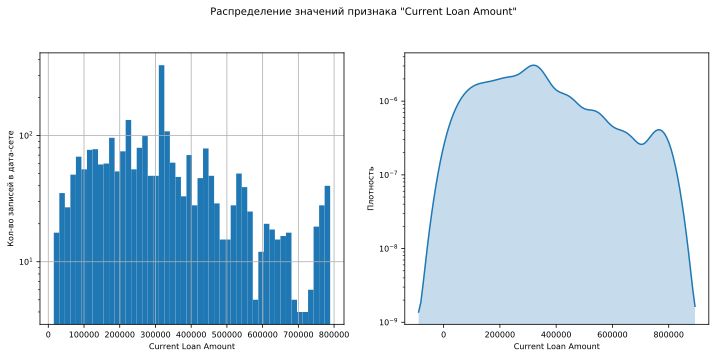

In [448]:
plot_hist_n_kde(df_test_prep['Current Loan Amount'], 'Current Loan Amount', y_log=True)

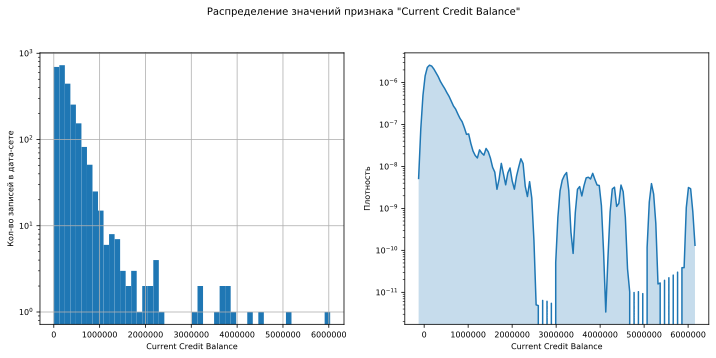

In [449]:
'''Current Credit Balance'''
plot_hist_n_kde(df_test_prep['Current Credit Balance'], 'Current Credit Balance', y_log=True)

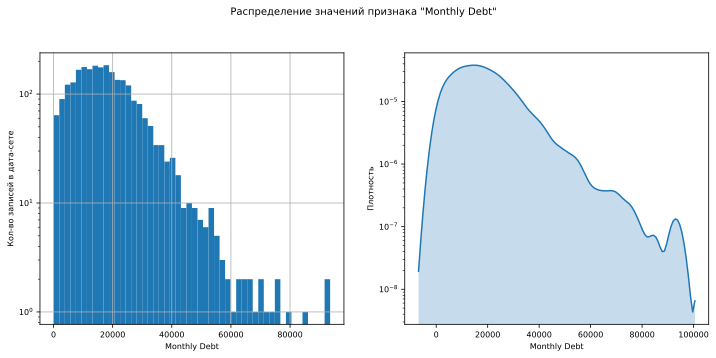

In [450]:
'''Monthly Debt'''
plot_hist_n_kde(df_test_prep['Monthly Debt'], 'Monthly Debt', y_log=True)

### 4. Преобразование категориальных признаков в бинарный тип данных тренировочного датасета

In [451]:
'''Обзор номинативных признаков'''
for cat_colname in df_train_prep.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train_prep[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
2332          371
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses 

In [452]:
'''Изменение типа данных признака Term'''
df_train_prep['Term'] = df_train_prep['Term'].map({'Short Term': '0', 'Long Term': '1'}).astype(int)

In [453]:
'''Изменение типа данных признаков Home Ownership, Years in current job, Purpose'''
df_train_prep =pd.get_dummies(df_train_prep)
df_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual Income                   7500 non-null   float64
 1   Tax Liens                       7500 non-null   float64
 2   Number of Open Accounts         7500 non-null   float64
 3   Years of Credit History         7500 non-null   float64
 4   Maximum Open Credit             7500 non-null   float64
 5   Number of Credit Problems       7500 non-null   float64
 6   Bankruptcies                    7500 non-null   float64
 7   Term                            7500 non-null   int32  
 8   Current Loan Amount             7500 non-null   float64
 9   Current Credit Balance          7500 non-null   float64
 10  Monthly Debt                    7500 non-null   float64
 11  Credit Score                    7500 non-null   float64
 12  Credit Default                  75

### 4.1 Преобразование категориальных признаков в бинарный тип данных тестового датасета

In [454]:
'''Обзор номинативных признаков'''
for cat_colname in df_test_prep.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_test_prep[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    1225
Rent             1020
Own Home          248
Have Mortgage       7
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    810
3 years      228
2 years      212
< 1 year     207
5 years      169
1 year       153
4 years      152
7 years      140
6 years      137
8 years      107
9 years       99
2332          86
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      1973
other                    240
home improvements        140
buy a car                 34
business loan             30
medical bills             27
buy house                 19
take a trip               14
major purchase             9
small business             5
educational expenses       3
vacation                   3
wedding                    2
movi

In [455]:
'''Изменение типа данных признака Term'''
df_test_prep['Term'] = df_test_prep['Term'].map({'Short Term': '0', 'Long Term': '1'}).astype(int)

In [456]:
'''Изменение типа данных признаков Home Ownership, Years in current job, Purpose'''
df_test_prep =pd.get_dummies(df_test_prep)
df_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual Income                   2500 non-null   float64
 1   Tax Liens                       2500 non-null   float64
 2   Number of Open Accounts         2500 non-null   float64
 3   Years of Credit History         2500 non-null   float64
 4   Maximum Open Credit             2500 non-null   float64
 5   Number of Credit Problems       2500 non-null   float64
 6   Bankruptcies                    2500 non-null   float64
 7   Term                            2500 non-null   int32  
 8   Current Loan Amount             2500 non-null   float64
 9   Current Credit Balance          2500 non-null   float64
 10  Monthly Debt                    2500 non-null   float64
 11  Credit Score                    2500 non-null   float64
 12  Home Ownership_Have Mortgage    25